<a href="https://colab.research.google.com/github/ethanosaurus6/Proyek-Akhir-Jaringan-Saraf-Tiruan/blob/main/Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Stress-Lysis.csv to Stress-Lysis.csv


In [3]:
df = pd.read_csv('Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [4]:
import numpy as np

class LVQ:
    def __init__(self):
        # Inisialisasi atribut kelas LVQ
        # weights: array kosong untuk menyimpan bobot prototipe (representasi setiap kelas)
        # labels: array kosong untuk menyimpan label yang sesuai dengan bobot
        self.weights = np.array([])
        self.labels = np.array([])

    def train(self, training_data, target_labels, learning_rate, decay_factor, max_epochs):
        # Mendapatkan label unik dan indeks pertama dari masing-masing label dalam data latih
        unique_labels, initial_indices = np.unique(target_labels, return_index=True)

        # Menyimpan label unik sebagai representasi kelas
        self.labels = unique_labels

        # Inisialisasi bobot awal dengan data latih yang mewakili setiap label unik
        self.weights = training_data[initial_indices].astype(np.float64)

        # Menghapus data latih yang sudah dipakai sebagai bobot awal dari data latih
        training_data = np.delete(training_data, initial_indices, axis=0)
        target_labels = np.delete(target_labels, initial_indices, axis=0)

        epoch = 0  # Mengatur epoch awal
        while epoch < max_epochs:  # Looping hingga mencapai jumlah maksimum epoch
            for i, sample in enumerate(training_data):
                # Menghitung jarak Euclidean kuadrat antara sampel dan setiap bobot
                distances = [np.sum((weight - sample) ** 2) for weight in self.weights]

                # Menentukan indeks bobot prototipe terdekat
                closest_index = np.argmin(distances)

                # Menentukan tanda penyesuaian berdasarkan apakah label cocok
                adjustment_sign = 1 if target_labels[i] == self.labels[closest_index] else -1

                # Menyesuaikan bobot prototipe terdekat (mendekatkan atau menjauhkan)
                self.weights[closest_index] += adjustment_sign * learning_rate * (sample - self.weights[closest_index])

            # Mengurangi learning rate dengan faktor peluruhan
            learning_rate *= decay_factor

            # Menambah jumlah epoch
            epoch += 1

    def predict(self, input_data):
        # Inisialisasi daftar untuk menyimpan prediksi
        predictions = []

        for sample in input_data:  # Iterasi melalui setiap sampel dalam data masukan
            # Menghitung jarak Euclidean kuadrat antara sampel dan setiap bobot
            distances = [np.sum((weight - sample) ** 2) for weight in self.weights]

            # Menentukan label dari bobot prototipe terdekat dan menambahkannya ke prediksi
            predictions.append(self.labels[np.argmin(distances)])

        # Mengembalikan array prediksi
        return np.array(predictions)

In [5]:
def calculate_accuracy(predicted_labels, true_labels):
    # Membandingkan setiap label prediksi dengan label sebenarnya
    # Jika cocok, tambahkan 1 ke daftar correct_predictions, jika tidak tambahkan 0
    correct_predictions = [1 if predicted_labels[i] == true_labels[i] else 0 for i in range(len(predicted_labels))]

    # Mengembalikan akurasi dengan membagi jumlah prediksi benar dengan total jumlah prediksi
    return sum(correct_predictions) / len(predicted_labels)

In [6]:
# Pranormalisasi data
scaler = MinMaxScaler()
features = df[['Humidity', 'Temperature', 'Step_count']]
scaled_features = scaler.fit_transform(features)

# Encoding target label
encoder = LabelEncoder()
target = encoder.fit_transform(df['Stress_Level'])

# Membagi dataset menjadi data latih dan data uji , random_state=42
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2)

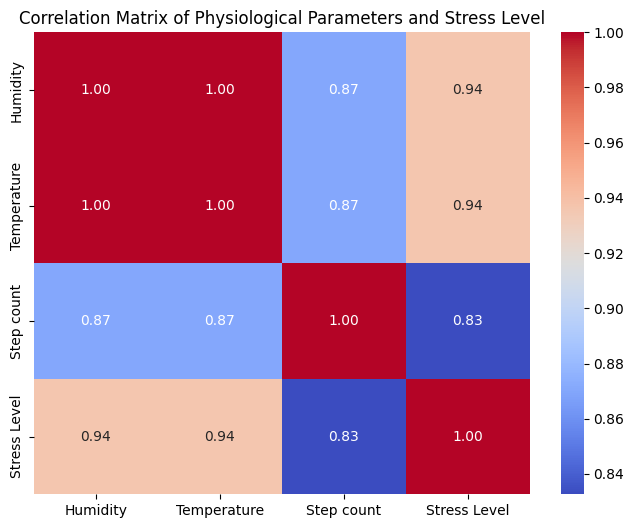

Parameter fisiologis yang paling berpengaruh: Humidity


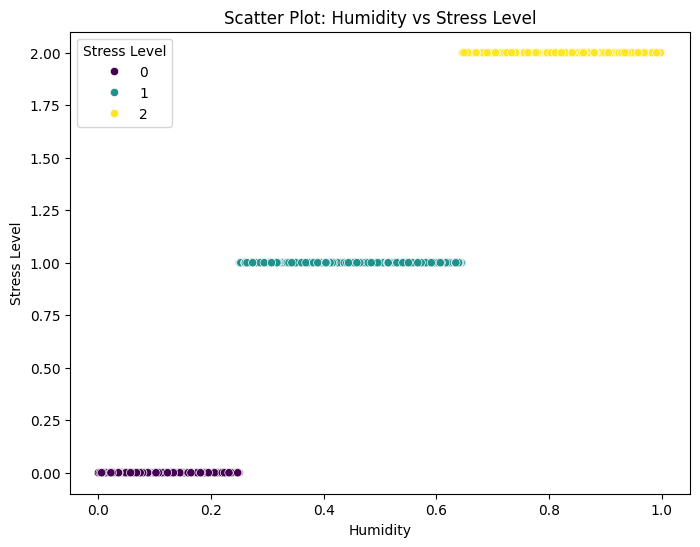

In [8]:
# Analisis Parameter Fisiologis
import seaborn as sns

# Gabungkan fitur yang telah diskalakan dengan label target untuk analisis korelasi
scaled_df = pd.DataFrame(scaled_features, columns=['Humidity', 'Temperature', 'Step count'])
scaled_df['Stress Level'] = target

# Hitung korelasi antar fitur
correlation_matrix = scaled_df.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Physiological Parameters and Stress Level")
plt.show()

# Analisis parameter paling berpengaruh
# Korelasi terhadap 'Stress Level'
stress_correlation = correlation_matrix['Stress Level'].drop('Stress Level')
most_influential_parameter = stress_correlation.abs().idxmax()
print(f"Parameter fisiologis yang paling berpengaruh: {most_influential_parameter}")

# Visualisasi scatter plot antara parameter paling berpengaruh dan tingkat stres
plt.figure(figsize=(8, 6))
sns.scatterplot(data=scaled_df, x=most_influential_parameter, y='Stress Level', hue='Stress Level', palette='viridis')
plt.title(f"Scatter Plot: {most_influential_parameter} vs Stress Level")
plt.xlabel(most_influential_parameter)
plt.ylabel("Stress Level")
plt.legend(title='Stress Level')
plt.show()
